In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
cr_, mn_, co_, ni_ = 1/3, 0.1, 1/3, 1/3-0.1
origin_list = np.load(f'/media/wz/7AD631A4D6316195/Projects/GSFE/origin_list_qua/origin_list{int(cr_*100)}{int(mn_*100)}{int(co_*100)}.npy')
fitness_mean = np.load(f'/media/wz/7AD631A4D6316195/Projects/GSFE/origin_list_qua/fitness_whole{int(cr_*100)}{int(mn_*100)}{int(co_*100)}.npy')
fitness = np.load(f'/media/wz/7AD631A4D6316195/Projects/GSFE/origin_list_qua/fitness_result{int(cr_*100)}{int(mn_*100)}{int(co_*100)}.npy')

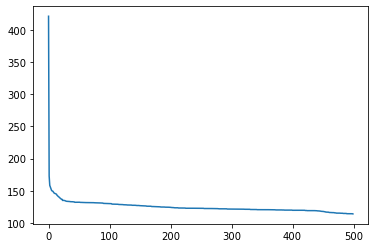

In [3]:
plt.plot(fitness_mean)

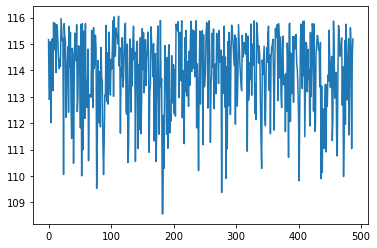

In [4]:
plt.plot(fitness)

{'beta': {'a': 53.17067456033746, 'b': 2.7490520016559232, 'loc': 51.72052366027862, 'scale': 48.21153878150036}}


,sumsquare_error,aic,bic,kl_div
beta,0.575837,549.545547,-3149.678975,inf
chi,0.915263,620.858515,-2936.656057,inf
gamma,0.945124,635.820337,-2921.470788,inf
anglit,1.480089,450.029168,-2715.469657,inf


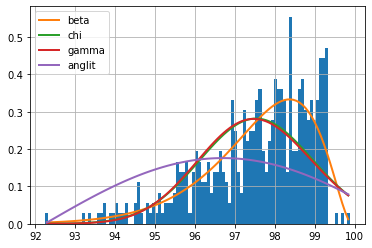

In [10]:
%matplotlib inline
from fitter import Fitter
valy_pair = np.array([round(i, 3) for i in fitness])
f_pair = Fitter(valy_pair, distributions = ['beta', 'chi', 'gamma', 'anglit'], timeout = 1500)
f_pair.fit()

print(f_pair.get_best())
f_pair.summary()

In [13]:
print(np.mean(fitness), len(origin_list))

97.56203617947648 473


In [3]:
origin_list = np.load(f'/media/wz/7AD631A4D6316195/Projects/GSFE/origin_list_qua/origin_list{int(cr_*100)}{int(mn_*100)}{int(co_*100)}.npy')
ind_raw = np.load('/media/wz/7AD631A4D6316195/Projects/GSFE/fcc_216/ind_raw.npy')

In [20]:
ind_raw

array([[0.        , 0.        , 0.        ],
       [0.70710678, 0.        , 0.        ],
       [1.41421356, 0.        , 0.        ],
       [0.35355339, 0.61237244, 0.        ],
       [1.06066017, 0.61237244, 0.        ],
       [1.76776695, 0.61237244, 0.        ],
       [0.        , 1.22474487, 0.        ],
       [0.70710678, 1.22474487, 0.        ],
       [1.41421356, 1.22474487, 0.        ],
       [0.35355339, 1.83711731, 0.        ],
       [1.06066017, 1.83711731, 0.        ],
       [1.76776695, 1.83711731, 0.        ],
       [0.        , 2.44948974, 0.        ],
       [0.70710678, 2.44948974, 0.        ],
       [1.41421356, 2.44948974, 0.        ],
       [0.35355339, 3.06186218, 0.        ],
       [1.06066017, 3.06186218, 0.        ],
       [1.76776695, 3.06186218, 0.        ],
       [0.        , 3.67423461, 0.        ],
       [0.70710678, 3.67423461, 0.        ],
       [1.41421356, 3.67423461, 0.        ],
       [0.35355339, 4.28660705, 0.        ],
       [1.

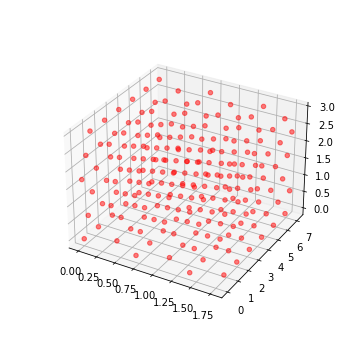

In [21]:
%matplotlib widget
# %matplotlib inline

def draw_3d(ind_raw):
    ind_raw = np.array(ind_raw)
    plt.rcParams["figure.figsize"] = [5, 5]
    # plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ind_raw[:,0], ind_raw[:,1], ind_raw[:,2], alpha = 0.5, c = 'r')
    plt.show()

# ind_raw = np.concatenate([cr_pos, co_pos, ni_pos], axis=0)
# ind_stack = np.concatenate([cr_stack, co_stack, ni_stack], axis=0)
draw_3d(ind_raw)

In [7]:
def norm_trans(input_array):
    input_array = np.array(input_array)
    return input_array/np.array([3*math.sqrt(1/2), 6*math.sqrt(3/2), 6*math.sqrt(1/3)])

def draw_3d(ind_raw):
    ind_raw = np.array(ind_raw)
    plt.rcParams["figure.figsize"] = [5, 5]
    # plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ind_raw[:,0], ind_raw[:,1], ind_raw[:,2], alpha = 0.5, c = 'r')
    plt.show()

def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Created Directory : ", directory)
    else:
        print("Directory already existed : ", directory)
    return directory

#* intrinsic stacking fault / extrinsic stacking fault 
def stack_trans(input_coor, mode='isf'):
    if mode == 'usf0':
        #* 1/24<112>
        for i in input_coor:
            if i[2] > 1.5:
                i[1] -= 1/6*math.sqrt(3/2)
                if i[1] < 0:
                    i[1] = 6*math.sqrt(3/2) + i[1]

    elif mode == 'usf1':
        #* 1/12<112>
        for i in input_coor:
            if i[2] > 1.5:
                i[1] -= 1/3*math.sqrt(3/2)
                if i[1] < 0:
                    i[1] = 6*math.sqrt(3/2) + i[1]

    elif mode == 'usf2':
        #* 1/8<112>
        for i in input_coor:
            if i[2] > 1.5:
                i[1] -= 1/2*math.sqrt(3/2)
                if i[1] < 0:
                    i[1] = 6*math.sqrt(3/2) + i[1]
        
    else:
        input_coor = np.array(input_coor)
        # when normal condition
        #* 1/6<112>
        for i in input_coor:
            if i[2] > 1.5:
                i[1] -= 2/3*math.sqrt(3/2)
                if i[1] < 0:
                    i[1] = 6*math.sqrt(3/2) + i[1]
        
        #* Based on isf config., movement of the 5th layer
        if mode == 'utf0':
            #* 1/6<112>+1/24<112>
            for i in input_coor:
                if i[2] > 2.2:
                    i[1] -= 1/6*math.sqrt(3/2)
                    if i[1] < 0:
                        i[1] = 6*math.sqrt(3/2) + i[1]
        
        elif mode == 'utf1':
            #* 1/6<112>+1/12<112>
            for i in input_coor:
                if i[2] > 2.2:
                    i[1] -= 1/3*math.sqrt(3/2)
                    if i[1] < 0:
                        i[1] = 6*math.sqrt(3/2) + i[1]

        elif mode == 'utf2':
            #* 1/6<112>+1/8<112>
            for i in input_coor:
                if i[2] > 2.2:
                    i[1] -= 1/2*math.sqrt(3/2)
                    if i[1] < 0:
                        i[1] = 6*math.sqrt(3/2) + i[1]

        elif mode == 'esf':
        #* 1/6<112>+1/6<112>
            for i in input_coor:
                if i[2] > 2.2:
                    i[1] -= 2/3*math.sqrt(3/2)
                    if i[1] < 0:
                        i[1] = 6*math.sqrt(3/2) + i[1]

    return input_coor

cr_, mn_, co_, ni_ = 1/3, 0.1, 1/3, 1/3-0.1
name_specie = 'Cr33Mn10Co33Ni23'

origin_list = np.load(f'/media/wz/7AD631A4D6316195/Projects/GSFE/origin_list_qua/origin_list{int(cr_*100)}{int(mn_*100)}{int(co_*100)}.npy')
ind_raw = np.load('/media/wz/7AD631A4D6316195/Projects/GSFE/fcc_216/ind_raw.npy')
dir_front = '/run/user/1000/gvfs/google-drive:host=gmail.com,user=zwang3805/0ADE4RTryWjiSUk9PVA/1OrAZMEHaX1PaJzxIh81neGrw5NbLvuPm/1-1UYw9XFm7lnGKPoowSp90OZIU2s0zAM/128YpPw9EoGtJRgzh2t9w4X_Ra1wsC38Z'
# dir_front = '/run/user/1000/gvfs/smb-share:server=nas-inuilab.local,share=data_users/WangZhi/GSFE/Config'
# dir_front = 'G:/マイドライブ/MSAD/CONFIG/multi_cor'
chosen_list = origin_list[::20][-10:-8]
len_index = len(chosen_list)
start_index = 1

name_raw = f'{name_specie}_raw'

name_usf0 = f'{name_specie}_usf0'
name_usf1 = f'{name_specie}_usf1'
name_usf2 = f'{name_specie}_usf2'

name_isf = f'{name_specie}_isf'

name_utf0 = f'{name_specie}_utf0'
name_utf1 = f'{name_specie}_utf1'
name_utf2 = f'{name_specie}_utf2'

name_esf = f'{name_specie}_esf'

for ind_ele in range(len_index):
    trial = start_index+ind_ele
    create_dir(dir_front + f'/{name_raw}_try{trial}')

    create_dir(dir_front + f'/{name_usf0}_try{trial}')
    create_dir(dir_front + f'/{name_usf1}_try{trial}')
    create_dir(dir_front + f'/{name_usf2}_try{trial}')

    create_dir(dir_front + f'/{name_isf}_try{trial}')

    create_dir(dir_front + f'/{name_utf0}_try{trial}')
    create_dir(dir_front + f'/{name_utf1}_try{trial}')
    create_dir(dir_front + f'/{name_utf2}_try{trial}')

    create_dir(dir_front + f'/{name_esf}_try{trial}')
    
    ele = chosen_list[ind_ele]
    ind_cr = np.where(ele == 2)[0]
    ind_mn = np.where(ele == 1)[0]
    ind_co = np.where(ele == -1)[0]
    ind_ni = np.where(ele == -2)[0]
    cr_list = np.array([ind_raw[i] for i in ind_cr], dtype=np.float32)
    mn_list = np.array([ind_raw[i] for i in ind_mn], dtype=np.float32)
    co_list = np.array([ind_raw[i] for i in ind_co], dtype=np.float32)
    ni_list = np.array([ind_raw[i] for i in ind_ni], dtype=np.float32)

    #*Divide configuration lists into atomic lists
    cr_pos_chosen = cr_list

    cr_pos_stack_us0 = norm_trans(stack_trans(cr_pos_chosen.copy(), mode='usf0'))
    cr_pos_stack_us1 = norm_trans(stack_trans(cr_pos_chosen.copy(), mode='usf1'))
    cr_pos_stack_us2 = norm_trans(stack_trans(cr_pos_chosen.copy(), mode='usf2'))

    cr_pos_stack = norm_trans(stack_trans(cr_pos_chosen.copy(), mode='isf'))

    cr_pos_stack_ut0 = norm_trans(stack_trans(cr_pos_chosen.copy(), mode='utf0'))
    cr_pos_stack_ut1 = norm_trans(stack_trans(cr_pos_chosen.copy(), mode='utf1'))
    cr_pos_stack_ut2 = norm_trans(stack_trans(cr_pos_chosen.copy(), mode='utf2'))

    cr_pos_stack_e = norm_trans(stack_trans(cr_pos_chosen.copy(), mode='esf'))
    cr_pos_chosen = norm_trans(cr_pos_chosen)

    for i_cr in range(len(cr_pos_chosen)):
        cr_pos_chosen[i_cr][2] = 1/2*cr_pos_chosen[i_cr][2]

        cr_pos_stack_us0[i_cr][2] = 1/2*cr_pos_stack_us0[i_cr][2]
        cr_pos_stack_us1[i_cr][2] = 1/2*cr_pos_stack_us1[i_cr][2]
        cr_pos_stack_us2[i_cr][2] = 1/2*cr_pos_stack_us2[i_cr][2]

        cr_pos_stack[i_cr][2] = 1/2*cr_pos_stack[i_cr][2]
        
        cr_pos_stack_ut0[i_cr][2] = 1/2*cr_pos_stack_ut0[i_cr][2]
        cr_pos_stack_ut1[i_cr][2] = 1/2*cr_pos_stack_ut1[i_cr][2]
        cr_pos_stack_ut2[i_cr][2] = 1/2*cr_pos_stack_ut2[i_cr][2]

        cr_pos_stack_e[i_cr][2] = 1/2*cr_pos_stack_e[i_cr][2]
        
    mn_pos_chosen = mn_list

    mn_pos_stack_us0 = norm_trans(stack_trans(mn_pos_chosen.copy(), mode='usf0'))
    mn_pos_stack_us1 = norm_trans(stack_trans(mn_pos_chosen.copy(), mode='usf1'))
    mn_pos_stack_us2 = norm_trans(stack_trans(mn_pos_chosen.copy(), mode='usf2'))

    mn_pos_stack = norm_trans(stack_trans(mn_pos_chosen.copy(), mode='isf'))

    mn_pos_stack_ut0 = norm_trans(stack_trans(mn_pos_chosen.copy(), mode='utf0'))
    mn_pos_stack_ut1 = norm_trans(stack_trans(mn_pos_chosen.copy(), mode='utf1'))
    mn_pos_stack_ut2 = norm_trans(stack_trans(mn_pos_chosen.copy(), mode='utf2'))

    mn_pos_stack_e = norm_trans(stack_trans(mn_pos_chosen.copy(), mode='esf'))
    mn_pos_chosen = norm_trans(mn_pos_chosen)

    for i_mn in range(len(mn_pos_chosen)):
        mn_pos_chosen[i_mn][2] = 1/2*mn_pos_chosen[i_mn][2]

        mn_pos_stack_us0[i_mn][2] = 1/2*mn_pos_stack_us0[i_mn][2]
        mn_pos_stack_us1[i_mn][2] = 1/2*mn_pos_stack_us1[i_mn][2]
        mn_pos_stack_us2[i_mn][2] = 1/2*mn_pos_stack_us2[i_mn][2]

        mn_pos_stack[i_mn][2] = 1/2*mn_pos_stack[i_mn][2]
        
        mn_pos_stack_ut0[i_mn][2] = 1/2*mn_pos_stack_ut0[i_mn][2]
        mn_pos_stack_ut1[i_mn][2] = 1/2*mn_pos_stack_ut1[i_mn][2]
        mn_pos_stack_ut2[i_mn][2] = 1/2*mn_pos_stack_ut2[i_mn][2]

        mn_pos_stack_e[i_mn][2] = 1/2*mn_pos_stack_e[i_mn][2]

    co_pos_chosen = co_list

    co_pos_stack_us0 = norm_trans(stack_trans(co_pos_chosen.copy(), mode='usf0'))
    co_pos_stack_us1 = norm_trans(stack_trans(co_pos_chosen.copy(), mode='usf1'))
    co_pos_stack_us2 = norm_trans(stack_trans(co_pos_chosen.copy(), mode='usf2'))

    co_pos_stack = norm_trans(stack_trans(co_pos_chosen.copy(), mode='isf'))

    co_pos_stack_ut0 = norm_trans(stack_trans(co_pos_chosen.copy(), mode='utf0'))
    co_pos_stack_ut1 = norm_trans(stack_trans(co_pos_chosen.copy(), mode='utf1'))
    co_pos_stack_ut2 = norm_trans(stack_trans(co_pos_chosen.copy(), mode='utf2'))

    co_pos_stack_e = norm_trans(stack_trans(co_pos_chosen.copy(), mode='esf'))
    co_pos_chosen = norm_trans(co_pos_chosen)

    for i_co in range(len(co_pos_chosen)):
        co_pos_chosen[i_co][2] = 1/2*co_pos_chosen[i_co][2]

        co_pos_stack_us0[i_co][2] = 1/2*co_pos_stack_us0[i_co][2]
        co_pos_stack_us1[i_co][2] = 1/2*co_pos_stack_us1[i_co][2]
        co_pos_stack_us2[i_co][2] = 1/2*co_pos_stack_us2[i_co][2]

        co_pos_stack[i_co][2] = 1/2*co_pos_stack[i_co][2]
        
        co_pos_stack_ut0[i_co][2] = 1/2*co_pos_stack_ut0[i_co][2]
        co_pos_stack_ut1[i_co][2] = 1/2*co_pos_stack_ut1[i_co][2]
        co_pos_stack_ut2[i_co][2] = 1/2*co_pos_stack_ut2[i_co][2]

        co_pos_stack_e[i_co][2] = 1/2*co_pos_stack_e[i_co][2]
        
    ni_pos_chosen = ni_list

    ni_pos_stack_us0 = norm_trans(stack_trans(ni_pos_chosen.copy(), mode='usf0'))
    ni_pos_stack_us1 = norm_trans(stack_trans(ni_pos_chosen.copy(), mode='usf1'))
    ni_pos_stack_us2 = norm_trans(stack_trans(ni_pos_chosen.copy(), mode='usf2'))

    ni_pos_stack = norm_trans(stack_trans(ni_pos_chosen.copy(), mode='isf'))

    ni_pos_stack_ut0 = norm_trans(stack_trans(ni_pos_chosen.copy(), mode='utf0'))
    ni_pos_stack_ut1 = norm_trans(stack_trans(ni_pos_chosen.copy(), mode='utf1'))
    ni_pos_stack_ut2 = norm_trans(stack_trans(ni_pos_chosen.copy(), mode='utf2'))

    ni_pos_stack_e = norm_trans(stack_trans(ni_pos_chosen.copy(), mode='esf'))
    ni_pos_chosen = norm_trans(ni_pos_chosen)

    for i_ni in range(len(ni_pos_chosen)):
        ni_pos_chosen[i_ni][2] = 1/2*ni_pos_chosen[i_ni][2]

        ni_pos_stack_us0[i_ni][2] = 1/2*ni_pos_stack_us0[i_ni][2]
        ni_pos_stack_us1[i_ni][2] = 1/2*ni_pos_stack_us1[i_ni][2]
        ni_pos_stack_us2[i_ni][2] = 1/2*ni_pos_stack_us2[i_ni][2]

        ni_pos_stack[i_ni][2] = 1/2*ni_pos_stack[i_ni][2]
        
        ni_pos_stack_ut0[i_ni][2] = 1/2*ni_pos_stack_ut0[i_ni][2]
        ni_pos_stack_ut1[i_ni][2] = 1/2*ni_pos_stack_ut1[i_ni][2]
        ni_pos_stack_ut2[i_ni][2] = 1/2*ni_pos_stack_ut2[i_ni][2]

        ni_pos_stack_e[i_ni][2] = 1/2*ni_pos_stack_e[i_ni][2]
    
    np.save(dir_front + f'/{name_raw}_try{trial}/{name_raw}_cr_chosen.npy', 
            cr_pos_chosen)
    np.save(dir_front + f'/{name_raw}_try{trial}/{name_raw}_mn_chosen.npy', 
            mn_pos_chosen)
    np.save(dir_front + f'/{name_raw}_try{trial}/{name_raw}_co_chosen.npy', 
            co_pos_chosen)
    np.save(dir_front + f'/{name_raw}_try{trial}/{name_raw}_ni_chosen.npy', 
            ni_pos_chosen)
    
    np.save(dir_front + f'/{name_usf0}_try{trial}/{name_usf0}_cr_usf0chosen.npy', 
            cr_pos_stack_us0)
    np.save(dir_front + f'/{name_usf0}_try{trial}/{name_usf0}_mn_usf0chosen.npy', 
            mn_pos_stack_us0)
    np.save(dir_front + f'/{name_usf0}_try{trial}/{name_usf0}_co_usf0chosen.npy', 
            co_pos_stack_us0)
    np.save(dir_front + f'/{name_usf0}_try{trial}/{name_usf0}_ni_usf0chosen.npy', 
            ni_pos_stack_us0)

    np.save(dir_front + f'/{name_usf1}_try{trial}/{name_usf1}_cr_usf1chosen.npy', 
            cr_pos_stack_us1)
    np.save(dir_front + f'/{name_usf1}_try{trial}/{name_usf1}_mn_usf1chosen.npy', 
            mn_pos_stack_us1)
    np.save(dir_front + f'/{name_usf1}_try{trial}/{name_usf1}_co_usf1chosen.npy', 
            co_pos_stack_us1)
    np.save(dir_front + f'/{name_usf1}_try{trial}/{name_usf1}_ni_usf1chosen.npy', 
            ni_pos_stack_us1)

    np.save(dir_front + f'/{name_usf2}_try{trial}/{name_usf2}_cr_usf2chosen.npy', 
            cr_pos_stack_us2)
    np.save(dir_front + f'/{name_usf2}_try{trial}/{name_usf2}_mn_usf2chosen.npy', 
            mn_pos_stack_us2)
    np.save(dir_front + f'/{name_usf2}_try{trial}/{name_usf2}_co_usf2chosen.npy', 
            co_pos_stack_us2)
    np.save(dir_front + f'/{name_usf2}_try{trial}/{name_usf2}_ni_usf2chosen.npy', 
            ni_pos_stack_us2)

    np.save(dir_front + f'/{name_isf}_try{trial}/{name_isf}_cr_isfchosen.npy', 
            cr_pos_stack)
    np.save(dir_front + f'/{name_isf}_try{trial}/{name_isf}_mn_isfchosen.npy', 
            mn_pos_stack)
    np.save(dir_front + f'/{name_isf}_try{trial}/{name_isf}_co_isfchosen.npy', 
            co_pos_stack)
    np.save(dir_front + f'/{name_isf}_try{trial}/{name_isf}_ni_isfchosen.npy', 
            ni_pos_stack)

    np.save(dir_front + f'/{name_utf0}_try{trial}/{name_utf0}_cr_utf0chosen.npy', 
            cr_pos_stack_ut0)
    np.save(dir_front + f'/{name_utf0}_try{trial}/{name_utf0}_mn_utf0chosen.npy', 
            mn_pos_stack_ut0)
    np.save(dir_front + f'/{name_utf0}_try{trial}/{name_utf0}_co_utf0chosen.npy', 
            co_pos_stack_ut0)
    np.save(dir_front + f'/{name_utf0}_try{trial}/{name_utf0}_ni_utf0chosen.npy', 
            ni_pos_stack_ut0)

    np.save(dir_front + f'/{name_utf1}_try{trial}/{name_utf1}_cr_utf1chosen.npy', 
            cr_pos_stack_ut1)
    np.save(dir_front + f'/{name_utf1}_try{trial}/{name_utf1}_mn_utf1chosen.npy', 
            mn_pos_stack_ut1)
    np.save(dir_front + f'/{name_utf1}_try{trial}/{name_utf1}_co_utf1chosen.npy', 
            co_pos_stack_ut1)
    np.save(dir_front + f'/{name_utf1}_try{trial}/{name_utf1}_ni_utf1chosen.npy', 
            ni_pos_stack_ut1)

    np.save(dir_front + f'/{name_utf2}_try{trial}/{name_utf2}_cr_utf2chosen.npy', 
            cr_pos_stack_ut2)
    np.save(dir_front + f'/{name_utf2}_try{trial}/{name_utf2}_mn_utf2chosen.npy', 
            mn_pos_stack_ut2)
    np.save(dir_front + f'/{name_utf2}_try{trial}/{name_utf2}_co_utf2chosen.npy', 
            co_pos_stack_ut2)
    np.save(dir_front + f'/{name_utf2}_try{trial}/{name_utf2}_ni_utf2chosen.npy', 
            ni_pos_stack_ut2)

    np.save(dir_front + f'/{name_esf}_try{trial}/{name_esf}_cr_esfchosen.npy', 
            cr_pos_stack_e)
    np.save(dir_front + f'/{name_esf}_try{trial}/{name_esf}_mn_esfchosen.npy', 
            mn_pos_stack_e)
    np.save(dir_front + f'/{name_esf}_try{trial}/{name_esf}_co_esfchosen.npy', 
            co_pos_stack_e)
    np.save(dir_front + f'/{name_esf}_try{trial}/{name_esf}_ni_esfchosen.npy', 
            ni_pos_stack_e)
    
    ind_stack = np.concatenate([cr_pos_stack, mn_pos_stack, co_pos_stack, ni_pos_stack], axis = 0)
    ind_stack_us0 = np.concatenate([cr_pos_stack_us0, mn_pos_stack_us0, co_pos_stack_us0, ni_pos_stack_us0], axis = 0)
    ind_stack_e = np.concatenate([cr_pos_stack_e, mn_pos_stack_e, co_pos_stack_e, ni_pos_stack_e], axis = 0)
    ind_stack_ut0 = np.concatenate([cr_pos_stack_ut0, mn_pos_stack_ut0, co_pos_stack_ut0, ni_pos_stack_ut0], axis = 0)
    ind_raw_after = np.concatenate([cr_pos_chosen, mn_pos_chosen, co_pos_chosen, ni_pos_chosen], axis = 0)

Created Directory :  /run/user/1000/gvfs/google-drive:host=gmail.com,user=zwang3805/0ADE4RTryWjiSUk9PVA/1OrAZMEHaX1PaJzxIh81neGrw5NbLvuPm/1-1UYw9XFm7lnGKPoowSp90OZIU2s0zAM/128YpPw9EoGtJRgzh2t9w4X_Ra1wsC38Z/Cr33Mn10Co33Ni23_raw_try1
Created Directory :  /run/user/1000/gvfs/google-drive:host=gmail.com,user=zwang3805/0ADE4RTryWjiSUk9PVA/1OrAZMEHaX1PaJzxIh81neGrw5NbLvuPm/1-1UYw9XFm7lnGKPoowSp90OZIU2s0zAM/128YpPw9EoGtJRgzh2t9w4X_Ra1wsC38Z/Cr33Mn10Co33Ni23_usf0_try1
Created Directory :  /run/user/1000/gvfs/google-drive:host=gmail.com,user=zwang3805/0ADE4RTryWjiSUk9PVA/1OrAZMEHaX1PaJzxIh81neGrw5NbLvuPm/1-1UYw9XFm7lnGKPoowSp90OZIU2s0zAM/128YpPw9EoGtJRgzh2t9w4X_Ra1wsC38Z/Cr33Mn10Co33Ni23_usf1_try1
Created Directory :  /run/user/1000/gvfs/google-drive:host=gmail.com,user=zwang3805/0ADE4RTryWjiSUk9PVA/1OrAZMEHaX1PaJzxIh81neGrw5NbLvuPm/1-1UYw9XFm7lnGKPoowSp90OZIU2s0zAM/128YpPw9EoGtJRgzh2t9w4X_Ra1wsC38Z/Cr33Mn10Co33Ni23_usf2_try1
Created Directory :  /run/user/1000/gvfs/google-drive:host=gmail.com,

In [8]:
ind_stack

array([[0.15713484, 0.        , 0.        ],
       [0.31426968, 0.02268046, 0.        ],
       [0.15713484, 0.04536092, 0.        ],
       [0.31426968, 0.04536092, 0.        ],
       [0.23570225, 0.05670115, 0.        ],
       [0.        , 0.06804138, 0.        ],
       [0.15713484, 0.06804138, 0.        ],
       [0.31426968, 0.06804138, 0.        ],
       [0.3928371 , 0.07938162, 0.        ],
       [0.23570225, 0.10206208, 0.        ],
       [0.15713484, 0.1134023 , 0.        ],
       [0.15713484, 0.03024062, 0.02405626],
       [0.07856742, 0.04158084, 0.02405626],
       [0.        , 0.05292107, 0.02405626],
       [0.07856742, 0.0642613 , 0.02405626],
       [0.3928371 , 0.0642613 , 0.02405626],
       [0.        , 0.07560153, 0.02405626],
       [0.23570225, 0.10962222, 0.02405626],
       [0.31426968, 0.01512031, 0.04811252],
       [0.3928371 , 0.02646054, 0.04811252],
       [0.07856742, 0.049141  , 0.04811252],
       [0.07856742, 0.07182146, 0.04811252],
       [0.

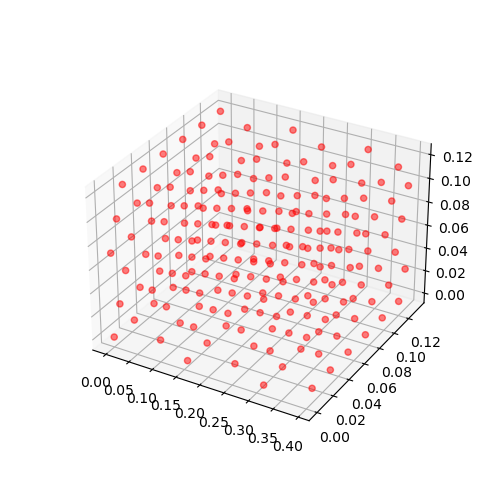

In [9]:
%matplotlib widget
draw_3d(ind_stack)